In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Importando o dataset do Kaggle, contendo todas as mortes durante a segunda
#guerra mundial, para efeito de comparação
dfCasualties = pd.read_csv('/kaggle/input/world-war-2-causalities-by-country/ww2_dataset.csv')
dfCasualties.head(10)

,Unnamed: 0,Country,Total population as of 1/1/1939,Militarydeaths from all causes,Civilian deaths due tomilitary activity and crimes against humanity,Totaldeaths,Deaths as % of1939 population,Average Deaths as % of1939 population,Militarywounded
0,0,Albania,"1,073,000","30,000",NaN,30000,2.80,2.80,NaN
1,1,Australia,"6,968,000","39,700",700,40400,0.58,0.58,"39,803"
2,2,Austria,"6,653,000",Included with Germany,Included with Germany,NaN,S2,S2,Included with Germany
3,3,Belgium,"8,387,000","12,000","76,000",88000,1.05,1.05,"55,513"
4,4,Brazil,"40,289,000","1,000","1,000",2000,0.00,0.00,"4,222"
5,5,Bulgaria,"6,458,000","18,500","3,000",21500,0.33,0.33,"21,878"
6,6,Burma,"16,119,000","2,600","250,000",252600,1.57,1.57,NaN
7,7,Canada,"11,267,000","42,000","1,600",43600,0.38,0.38,"53,174"
8,8,China,"517,568,000","3,000,000 to 3,750,000+","7,357,000 to 8,191,000","15,000,000to 20,000,000",2.90 to 3.86,3.38,"1,761,335"
9,9,Cuba,"4,235,000",NaN,100,100,0.00,0.00,NaN


In [3]:
#No caso da segunda guerra mundial, eu só estou interessado no total de
#mortos em relação à população, pois quero comparar tanto a quantidade absoluta
#quanto a quantidade em relação à população e comparado com o tempo do conflito
#Assim, temos uma base de comparação da dimensão que foi a segunda guerra mundial
#e a guerra na Ucrânia

#Removendo os casos em que não há valor de total de mortes
dfCasualties = dfCasualties.dropna(subset=['Totaldeaths'])

#Contabilizando os dados em que o total de mortes é uma estimativa entre dois valores
dfCasualties[dfCasualties['Totaldeaths'].str.contains('to')].head(10)

,Unnamed: 0,Country,Total population as of 1/1/1939,Militarydeaths from all causes,Civilian deaths due tomilitary activity and crimes against humanity,Totaldeaths,Deaths as % of1939 population,Average Deaths as % of1939 population,Militarywounded
8,8,China,"517,568,000","3,000,000 to 3,750,000+","7,357,000 to 8,191,000","15,000,000to 20,000,000",2.90 to 3.86,3.38,"1,761,335"
10,10,Czechoslovakia,"14,612,000","35,000 to 46,000","294,000 to320,000","340,000 to 355,000",2.33 to 2.43,2.38,"8,017"
12,12,Dutch East Indies,"69,435,000","11,500","300,000","3,000,000to 4,000,000",4.3 to 5.76,5.03,NaN
18,18,French Indochina,"24,664,000",NaN,NaN,"1,000,000to 2,200,000",4.05 to 8.11,6.08,NaN
19,19,Germany,"69,300,000","4,440,000 to 5,318,000","1,500,000to 3,000,000S1","6,900,000 to 7,400,000",S2,S2,"7,300,000"
20,20,Greece,"7,222,000","35,100","171,800","507,000to 807,000",7.02 to 11.17,9.095,"47,290"
21,21,Guam,"22,800","1,000to 2,000",NaN,"1,000to 2,000",4.39 to 8.77,6.58,NaN
22,22,Hungary,"9,129,000","200,000","264,000to 664,000","464,000to 864,000",5.08 to 9.46,7.27,"89,313"
24,24,India,"377,800,000","87,000",NaN,"2,200,000to 3,087,000",0.58,0.58,"64,354"
28,28,Italy,"44,394,000","319,200 to 341,000 Italian nationals and c. 20...","153,200","492,400 to 514,000",1.11 to 1.16,1.135,"225,000-320,000"


In [4]:
#Aplicando a média e normalizando os demais valores numéricos do número de mortes
def normalize_values(value):
    value = str(value).replace(',', '').replace(' ', '')
    if 'to' in value:
        numbers = value.split('to')
        if len(numbers) == 2:
            #Foi inserido uma barra dupla na divisão para que o resultado fosse um int
            return (int(numbers[0]) + int(numbers[1])) // 2
        else:
            return value
    elif '–' in value:
        numbers = value.split('–')
        if len(numbers) == 2:
            return (int(numbers[0]) + int(numbers[1])) // 2
        else:
            return value
    return value
    
#Aplicando a função para o número de mortes
dfCasualties['Totaldeaths'] = dfCasualties['Totaldeaths'].apply(normalize_values)
dfCasualties.head(10)

,Unnamed: 0,Country,Total population as of 1/1/1939,Militarydeaths from all causes,Civilian deaths due tomilitary activity and crimes against humanity,Totaldeaths,Deaths as % of1939 population,Average Deaths as % of1939 population,Militarywounded
0,0,Albania,"1,073,000","30,000",NaN,30000,2.80,2.80,NaN
1,1,Australia,"6,968,000","39,700",700,40400,0.58,0.58,"39,803"
3,3,Belgium,"8,387,000","12,000","76,000",88000,1.05,1.05,"55,513"
4,4,Brazil,"40,289,000","1,000","1,000",2000,0.00,0.00,"4,222"
5,5,Bulgaria,"6,458,000","18,500","3,000",21500,0.33,0.33,"21,878"
6,6,Burma,"16,119,000","2,600","250,000",252600,1.57,1.57,NaN
7,7,Canada,"11,267,000","42,000","1,600",43600,0.38,0.38,"53,174"
8,8,China,"517,568,000","3,000,000 to 3,750,000+","7,357,000 to 8,191,000",17500000,2.90 to 3.86,3.38,"1,761,335"
9,9,Cuba,"4,235,000",NaN,100,100,0.00,0.00,NaN
10,10,Czechoslovakia,"14,612,000","35,000 to 46,000","294,000 to320,000",347500,2.33 to 2.43,2.38,"8,017"


In [5]:
#Normalizando os valores de população também
dfCasualties['Total population as of 1/1/1939'] = dfCasualties['Total population as of 1/1/1939'].apply(normalize_values)
dfCasualties.head()

,Unnamed: 0,Country,Total population as of 1/1/1939,Militarydeaths from all causes,Civilian deaths due tomilitary activity and crimes against humanity,Totaldeaths,Deaths as % of1939 population,Average Deaths as % of1939 population,Militarywounded
0,0,Albania,1073000,"30,000",NaN,30000,2.80,2.80,NaN
1,1,Australia,6968000,"39,700",700,40400,0.58,0.58,"39,803"
3,3,Belgium,8387000,"12,000","76,000",88000,1.05,1.05,"55,513"
4,4,Brazil,40289000,"1,000","1,000",2000,0.00,0.00,"4,222"
5,5,Bulgaria,6458000,"18,500","3,000",21500,0.33,0.33,"21,878"


In [6]:
#Criando o dataframe da população mundial para pegar os valores da população antes da guerra
#Da Ucrânia e Rússia
dfPopulation = pd.read_csv('/kaggle/input/world-population-dataset/world_population.csv')
dfPopulation.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [7]:
#População da Ucrânia e da Rússica antes da guerra
#Retirados do dataframe do Kaggle de população
ukraine_population = dfPopulation[dfPopulation['Country/Territory'] == 'Ukraine']['2022 Population'].iloc[0]
russia_population = dfPopulation[dfPopulation['Country/Territory'] == 'Russia']['2022 Population'].iloc[0]

print('População da Ucrânia antes da guerra: ', ukraine_population, '\nPopulação da Rússica antes da guerra: ', russia_population)

População da Ucrânia antes da guerra:  39701739 
População da Rússica antes da guerra:  144713314


In [8]:
#De acordo com os dados do DataGlowUp desafio 33, segue a quantidade de mortos
#civis e militares na guerra, para cada lado
ukraine_casualties = 179227
russia_casualties = 282714

In [9]:
#Criando um dataframe contendo todas as informações que eu quero

#Foram considerados 788 dias de guerra na Ucrânia, já que os dados vão desde
#o início da guerra em 24/02/2022 até o dia 22/04/2024
dfWars = pd.DataFrame({
    'Country': ['Ukraine', 'Russia'],
    'Population_Before': [ukraine_population, russia_population],
    'Casualties': [ukraine_casualties, russia_casualties],
    'Casualties_Population_Percentage': [ukraine_casualties / ukraine_population * 100, russia_casualties / russia_population * 100],
    'Days_of_War': [788, 788],
    'War': ['Russo-Ukrainian War', 'Russo-Ukrainian War']
})

dfWars.head()

,Country,Population_Before,Casualties,Casualties_Population_Percentage,Days_of_War,War
0,Ukraine,39701739,179227,0.451434,788,Russo-Ukrainian War
1,Russia,144713314,282714,0.195361,788,Russo-Ukrainian War


In [10]:
#Criando um dataframe diferente para poder manipulá-lo à vontade para ficar parecido
#com o dfWars
dfWW2 = dfCasualties.copy()

#Removendo as colunas que não são de interesse
dfWW2.drop(columns=dfWW2.columns[[0, 3, 4, 6, 8]], inplace=True)

#Mapeando as colunas correspondentes nesse dataset para o novo
column_mapping = {
    dfWW2.columns.str.strip()[1]: 'Population_Before',
    dfWW2.columns.str.strip()[2]: 'Casualties',
    dfWW2.columns.str.strip()[3]: 'Casualties_Population_Percentage'
}

dfWW2.rename(columns=column_mapping, inplace=True)

dfWW2.head()

,Country,Population_Before,Casualties,Casualties_Population_Percentage
0,Albania,1073000,30000,2.80
1,Australia,6968000,40400,0.58
3,Belgium,8387000,88000,1.05
4,Brazil,40289000,2000,0.00
5,Bulgaria,6458000,21500,0.33


In [11]:
#Adicionando mais duas colunas no dfWorldWar2 para ficar semelhante ao dfWars e poder
#aplicar o append

#A segunda guerra mundial teve duração de 2193 dias
dfWW2['Days_of_War'] = 2193
dfWW2['War'] = "Second World War"

dfWW2.head()

,Country,Population_Before,Casualties,Casualties_Population_Percentage,Days_of_War,War
0,Albania,1073000,30000,2.80,2193,Second World War
1,Australia,6968000,40400,0.58,2193,Second World War
3,Belgium,8387000,88000,1.05,2193,Second World War
4,Brazil,40289000,2000,0.00,2193,Second World War
5,Bulgaria,6458000,21500,0.33,2193,Second World War


In [12]:
#Juntar os valores do dataframe do world war casualties
dfWars = pd.concat([dfWars, dfWW2], ignore_index=True)

dfWars.head()

,Country,Population_Before,Casualties,Casualties_Population_Percentage,Days_of_War,War
0,Ukraine,39701739,179227,0.451434,788,Russo-Ukrainian War
1,Russia,144713314,282714,0.195361,788,Russo-Ukrainian War
2,Albania,1073000,30000,2.80,2193,Second World War
3,Australia,6968000,40400,0.58,2193,Second World War
4,Belgium,8387000,88000,1.05,2193,Second World War


In [13]:
#Convertendo valores de string para int ou float
dfWars['Population_Before'] = dfWars['Population_Before'].astype('int')
dfWars['Casualties'] = dfWars['Casualties'].astype('int')

#Fazendo o cálculo de percentual com base nos dados de população e morte
dfWars['Casualties_Population_Percentage'] = dfWars['Casualties'] / dfWars['Population_Before'] * 100

dfWars.head()

,Country,Population_Before,Casualties,Casualties_Population_Percentage,Days_of_War,War
0,Ukraine,39701739,179227,0.451434,788,Russo-Ukrainian War
1,Russia,144713314,282714,0.195361,788,Russo-Ukrainian War
2,Albania,1073000,30000,2.795899,2193,Second World War
3,Australia,6968000,40400,0.579793,2193,Second World War
4,Belgium,8387000,88000,1.049243,2193,Second World War


In [14]:
#Somando valores de população, mortes e fazendo o cálculo global de percentual de mortos
population_ww2 = dfWars[dfWars['War'] == 'Second World War']['Population_Before'].sum()
casualties_ww2 = dfWars[dfWars['War'] == 'Second World War']['Casualties'].sum()
casualties_percentage_ww2 = casualties_ww2 / population_ww2 * 100

population_ru = dfWars[dfWars['War'] == 'Russo-Ukrainian War']['Population_Before'].sum()
casualties_ru = dfWars[dfWars['War'] == 'Russo-Ukrainian War']['Casualties'].sum()
casualties_percentage_ru = casualties_ru / population_ru  * 100

print(
    'Percentual de mortos na guerra em comparação com a população antes do conflito\n',
    'Guerra Russa-Ucraniana: ', casualties_percentage_ru, '%\n',
    'Segunda Guerra Mundial: ', casualties_percentage_ww2, '%'
)

Percentual de mortos na guerra em comparação com a população antes do conflito
 Guerra Russa-Ucraniana:  0.2504898556193241 %
 Segunda Guerra Mundial:  3.685846778233448 %


In [15]:
#Fazendo a comparação através da quantidade de dias
days_ww2 = dfWars[dfWars['War'] == 'Second World War'].iloc[0]['Days_of_War']
days_ru = dfWars[dfWars['War'] == 'Russo-Ukrainian War'].iloc[0]['Days_of_War']

#Convertendo para anos
years_ww2 = days_ww2 / 365
years_ru = days_ru / 365

print('Quantos anos durou a segunda guerra mundial? ', years_ww2, '\n',
      'Quantos está durando a guerra russo-ucraniana?', years_ru)

Quantos anos durou a segunda guerra mundial?  6.008219178082192 
 Quantos está durando a guerra russo-ucraniana? 2.158904109589041


In [16]:
#Fazer uma relação de percentual de mortos com os anos de guerra
casualties_percentage_ww2_per_year = casualties_percentage_ww2 / years_ww2
casualties_percentage_ru_per_year = casualties_percentage_ru / years_ru

print('Percentual das populações mortas por ano\nGuerra Russa-Ucraniana: ',
      casualties_percentage_ru_per_year, '%\n',
    'Segunda Guerra Mundial:', casualties_percentage_ww2_per_year, '%')

Percentual das populações mortas por ano
Guerra Russa-Ucraniana:  0.11602639251402701 %
 Segunda Guerra Mundial: 0.6134674300297348 %


In [17]:
#Divide essa ração para ver em quantas vezes a segunda guerra mundial foi mais
#impactante
print(casualties_percentage_ww2_per_year / casualties_percentage_ru_per_year)

5.287309350375344


In [18]:
#Criando o dataframe para ser gerada a tabela
dfComparison = pd.DataFrame({
    'War': ['Second World War', 'Russo-Ukrainian War'],
    'Casualties in relation to Population (per year)': [casualties_percentage_ww2_per_year, casualties_percentage_ru_per_year]
})

<Axes: xlabel='Country', ylabel='Casualties'>

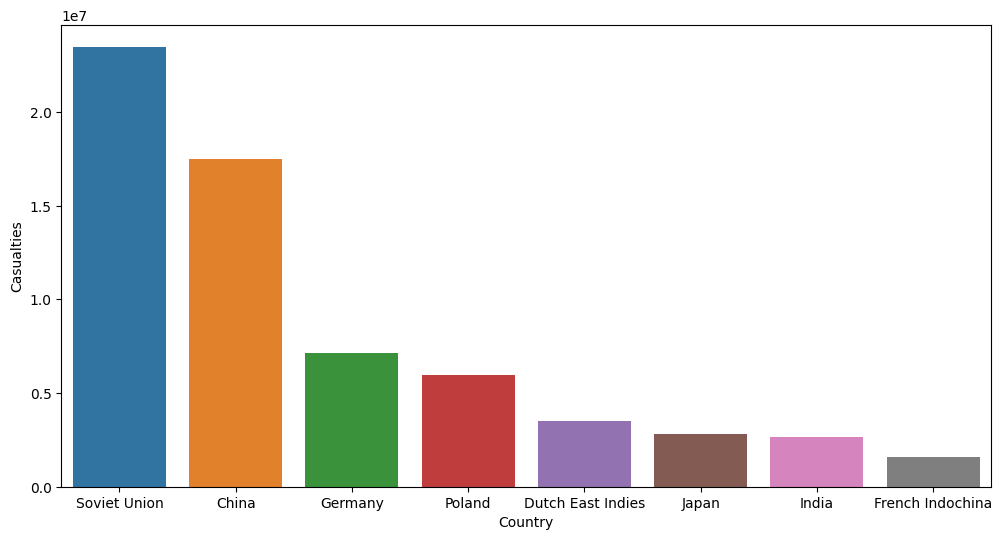

In [19]:
#Exibir gráfico dos países que tiveram mais mortes usando o Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=dfWars.nlargest(8, 'Casualties'), x='Country', y='Casualties')

#Logo se nota que Rússia e Ucrânia não aparecem nas opções

<Axes: xlabel='War', ylabel='Casualties in relation to Population (per year)'>

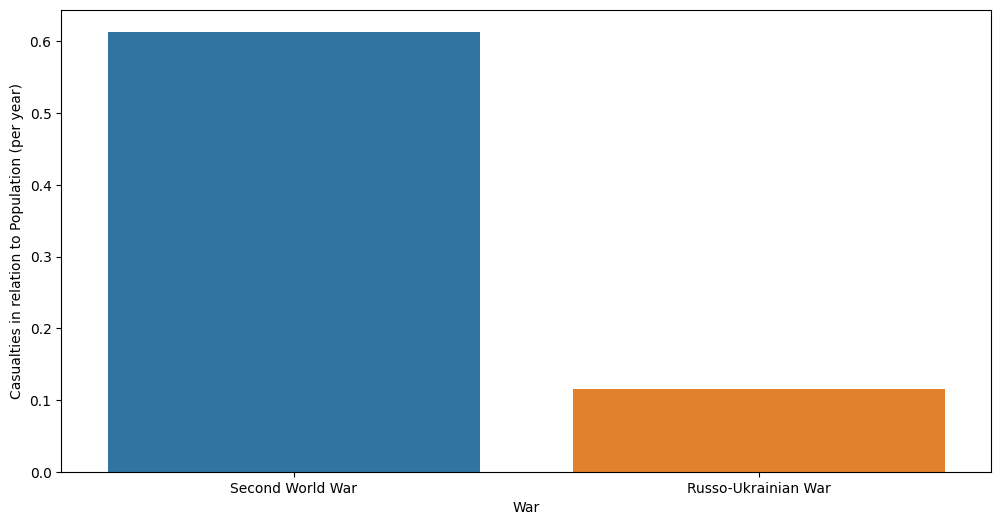

In [20]:
#Exibir gráfico do percentual de mortes com base na população prévia, já
#dividido por cada ano de guerra
plt.figure(figsize=(12,6))
sns.barplot(data=dfComparison, x='War', y='Casualties in relation to Population (per year)')

In [21]:
#Consolidado para o post
print('Guerra Russo-Ucraniana',
     '\nTotal de mortos: ', casualties_ru,
     '\nPopulação antes da guerra: ', population_ru,
     '\nRedução da população: ', casualties_percentage_ru,
     '\nRedução da população por ano: ', casualties_percentage_ru_per_year)

print('\n\nSegunda Guerra Mundial',
     '\nTotal de mortos: ', casualties_ww2,
     '\nPopulação antes da guerra: ', population_ww2,
     '\nRedução da população: ', casualties_percentage_ww2,
     '\nRedução da população por ano: ', casualties_percentage_ww2_per_year)

Guerra Russo-Ucraniana 
Total de mortos:  461941 
População antes da guerra:  184415053 
Redução da população:  0.2504898556193241 
Redução da população por ano:  0.11602639251402701


Segunda Guerra Mundial 
Total de mortos:  73089306 
População antes da guerra:  1982971903 
Redução da população:  3.685846778233448 
Redução da população por ano:  0.6134674300297348
